<a href="https://colab.research.google.com/github/ayush4972/Fall_Sem-2025_Exploratory-Data-Analysis-/blob/main/22BCE3913.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**AYUSH CHAUDHARY 22BCE3913**


In [ ]:
https://github.com/ayush4972/Fall_Sem-2025_Exploratory-Data-Analysis-/blob/main/22BCE3913.ipynb
https://colab.research.google.com/drive/1Ndh0voCMLeA9QdzNM8eZu9cTCtPk2veE#scrollTo=AbrmT_kvWE6q

# **Module 1**

**1: Loading the Dataset, Exploring Dimensions, Summary, and Data Handling**

**1.1 Load Dataset**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
url = 'https://raw.githubusercontent.com/salemprakash/EDA/main/Data/drug200.csv'
df = pd.read_csv(url)

# View the column names
print(df.columns)

# View the first few rows of the dataset
df.head()

Index(['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K', 'Drug'], dtype='object')


,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


**1.2 Explore Dimensions and Summary**

In [2]:
# Check dataset dimensions
print(f"The dataset contains {df.shape[0]} rows and {df.shape[1]} columns.")

# Basic information of the dataset
df.info()

# Statistical summary of numerical features
df.describe()

The dataset contains 200 rows and 6 columns.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  199 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         199 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


**1.3 Data Handling: Check and fill missing values in numeric columns with median and non-numeric columns with mode.**

In [3]:
# Checking for missing values
print("Missing values before filling:")
print(df.isnull().sum())

# Separating numeric and non-numeric columns
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
non_numeric_cols = df.select_dtypes(exclude=['float64', 'int64']).columns

# Fill missing values for numeric columns with the median
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

# Fill missing values for non-numeric columns with the mode
for col in non_numeric_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

# Check again after filling
print("\nMissing values after filling:")
print(df.isnull().sum())

Missing values before filling:
Age            0
Sex            0
BP             0
Cholesterol    1
Na_to_K        0
Drug           1
dtype: int64

Missing values after filling:
Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64


/tmp/ipython-input-368428433.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


In [4]:
df = df.assign(
    Sex=df['Sex'].fillna(df['Sex'].mode()[0]),
    BP=df['BP'].fillna(df['BP'].mode()[0]),
    Cholesterol=df['Cholesterol'].fillna(df['Cholesterol'].mode()[0]),
    Drug=df['Drug'].fillna(df['Drug'].mode()[0])
)

# **Step 2: Data Cleaning and Handling**

**2.1 Removing Duplicates**

In [5]:
# Check for duplicate rows
duplicate_count = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")

# Remove duplicates
df = df.drop_duplicates()
print(f"Shape after removing duplicates: {df.shape}")

Number of duplicate rows: 0
Shape after removing duplicates: (200, 6)


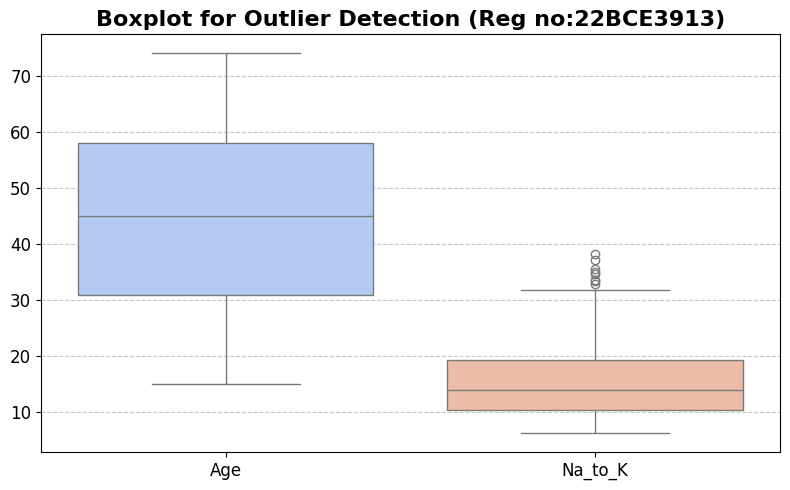

Shape after filtering out outliers: (190, 6)


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Boxplot to detect outliers in numeric columns
plt.figure(figsize=(8, 5))
sns.boxplot(data=df[['Age', 'Na_to_K']], palette='coolwarm')
plt.title('Boxplot for Outlier Detection (Reg no:22BCE3913)', fontsize=16, weight='bold')
plt.xticks(rotation=0, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Filter out outliers based on Na_to_K (adjust threshold if needed)
threshold = df['Na_to_K'].quantile(0.95)
df_filtered = df[df['Na_to_K'] < threshold]

print(f"Shape after filtering out outliers: {df_filtered.shape}")

# **Step 3: Univariate Analysis**

**3.1 Histogram**

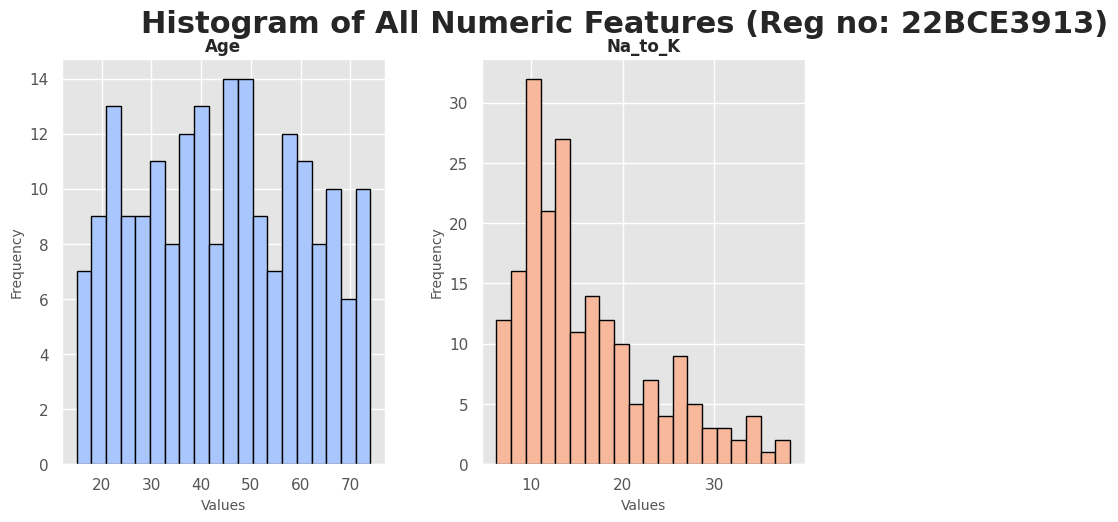

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set the style
sns.set(style="whitegrid")
plt.style.use('ggplot')

# Select numeric columns
df_numeric = df.select_dtypes(include=['float64', 'int64'])

# Determine subplot grid size
num_features = len(df_numeric.columns)
num_cols = 3
num_rows = -(-num_features // num_cols)  # Ceiling division

# Generate a color palette with distinct colors
colors = sns.color_palette("coolwarm", num_features)

# Create subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 5 * num_rows))
axes = axes.flatten()

# Plot histograms for each numerical column
for i, column in enumerate(df_numeric.columns):
    df_numeric[column].plot(
        kind='hist', ax=axes[i], bins=20,
        color=colors[i], edgecolor='black', linewidth=1.0
    )
    axes[i].set_title(column, fontsize=12, weight='bold')
    axes[i].set_xlabel('Values', fontsize=10)
    axes[i].set_ylabel('Frequency', fontsize=10)

# Remove unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.suptitle('Histogram of All Numeric Features (Reg no: 22BCE3913)', fontsize=22, weight='bold', y=1.02)
plt.subplots_adjust(top=0.92, hspace=0.4, wspace=0.3)
plt.show()

## **3.2 Density Plot for area_mean**

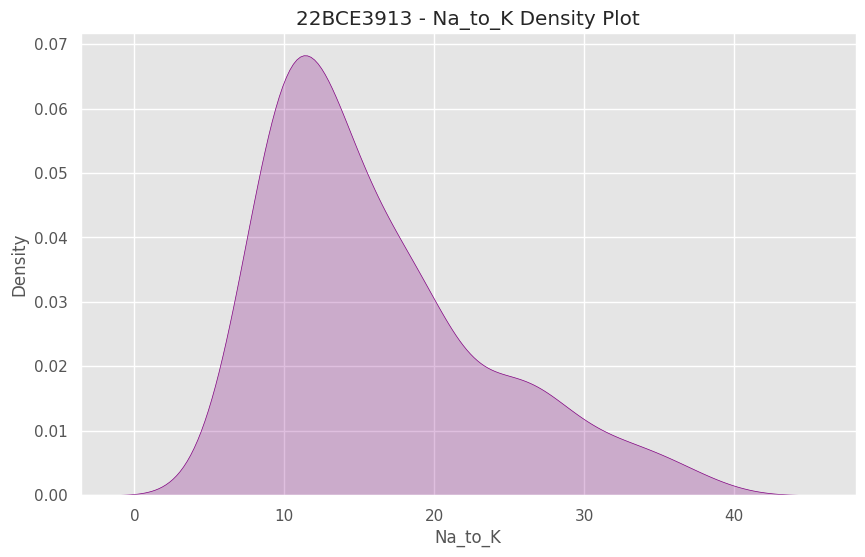

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.kdeplot(df['Na_to_K'], color='purple', fill=True)
plt.title("22BCE3913 - Na_to_K Density Plot")
plt.xlabel("Na_to_K")
plt.ylabel("Density")
plt.show()

# **3.3 Box Plot for area_mean**


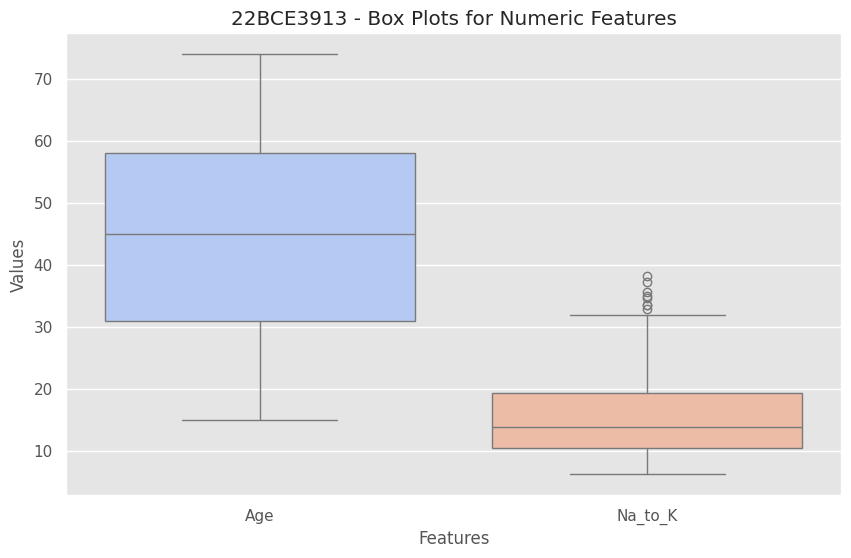

In [9]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['Age', 'Na_to_K']], palette='coolwarm')
plt.title("22BCE3913 - Box Plots for Numeric Features")
plt.xlabel("Features")
plt.ylabel("Values")
plt.show()

# **3.4 Bar Plot for Gender**

/tmp/ipython-input-777723110.py:28: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Gender', loc='upper left', fontsize=10, bbox_to_anchor=(1, 1))


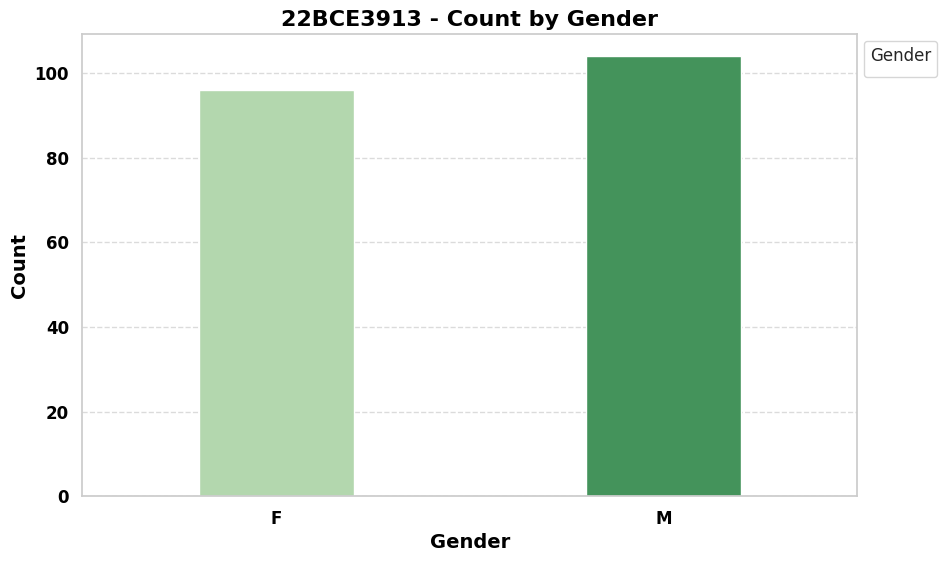

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid")

# Create the figure and size
plt.figure(figsize=(10, 6))
colors = sns.color_palette("Greens", n_colors=2)

# Create the count plot based on 'Sex'
sns.countplot(x='Sex', hue='Sex', data=df, palette=colors, width=0.4)

# Set the title with bold font
plt.title("22BCE3913 - Count by Gender", fontsize=16, fontweight='bold', color='black')

# Customize the x and y axis labels
plt.xlabel("Gender", fontsize=14, color='black', fontweight='bold')
plt.ylabel("Count", fontsize=14, color='black', fontweight='bold')

# Customize tick parameters for a clean look
plt.xticks(fontsize=12, color='black', fontweight='bold')
plt.yticks(fontsize=12, color='black', fontweight='bold')

# Add gridlines for better readability with dashed style
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add a legend outside the plot area
plt.legend(title='Gender', loc='upper left', fontsize=10, bbox_to_anchor=(1, 1))

# Show the plot
plt.show()

# **3.5 Pie Plot for Gender**

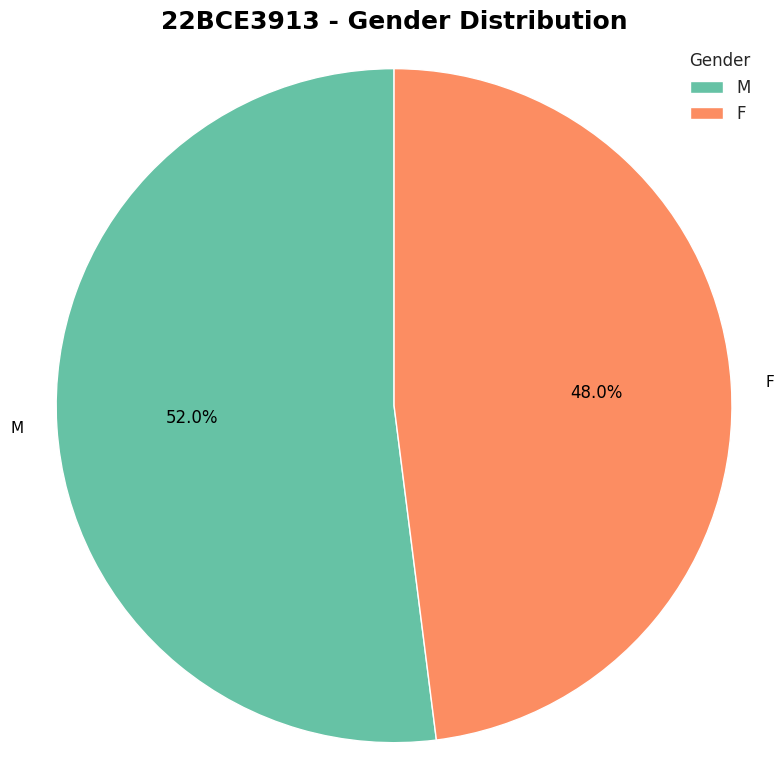

In [11]:
import matplotlib.pyplot as plt

# Get gender counts
gender_counts = df['Sex'].value_counts()

# Create the figure with a balanced size
plt.figure(figsize=(8, 8))

# Custom color palette
colors = ['#66c2a5', '#fc8d62']

# Create the pie chart
wedges, texts, autotexts = plt.pie(
    gender_counts,
    labels=gender_counts.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=colors,
    shadow=False,
    radius=0.8
)

# Set the title
plt.title("22BCE3913 - Gender Distribution", fontsize=18, fontweight='bold', color='black')
plt.axis('equal')  # Ensures the pie chart is circular

# Customize text colors
for text in texts:
    text.set_color('black')
for text in autotexts:
    text.set_color('black')

# Create a legend
plt.legend(wedges, gender_counts.index, title="Gender", loc="upper right", fontsize=12, frameon=False)

# Improve layout
plt.tight_layout()

# Show the pie chart
plt.show()

# **3.6 Dotplot**

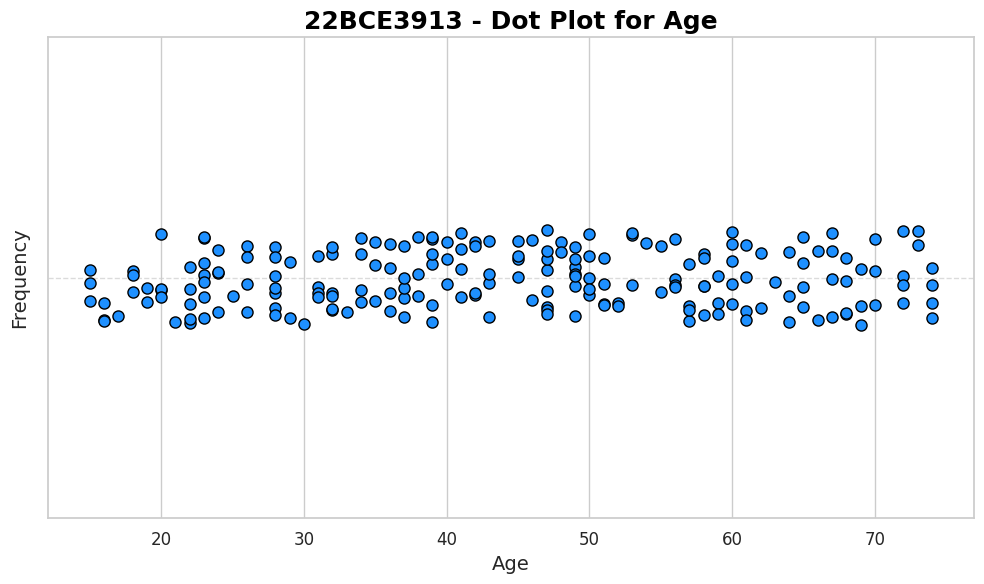

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))

# Dot plot for 'Age' with updated colors
sns.stripplot(x='Age', data=df, color='#1E90FF', size=8, jitter=True, edgecolor='black', linewidth=1)

plt.title("22BCE3913 - Dot Plot for Age", fontsize=18, fontweight='bold', color='black')
plt.xlabel("Age", fontsize=14)
plt.ylabel("Frequency", fontsize=14)

# Customize ticks and labels
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# **3.7 Boxplot**

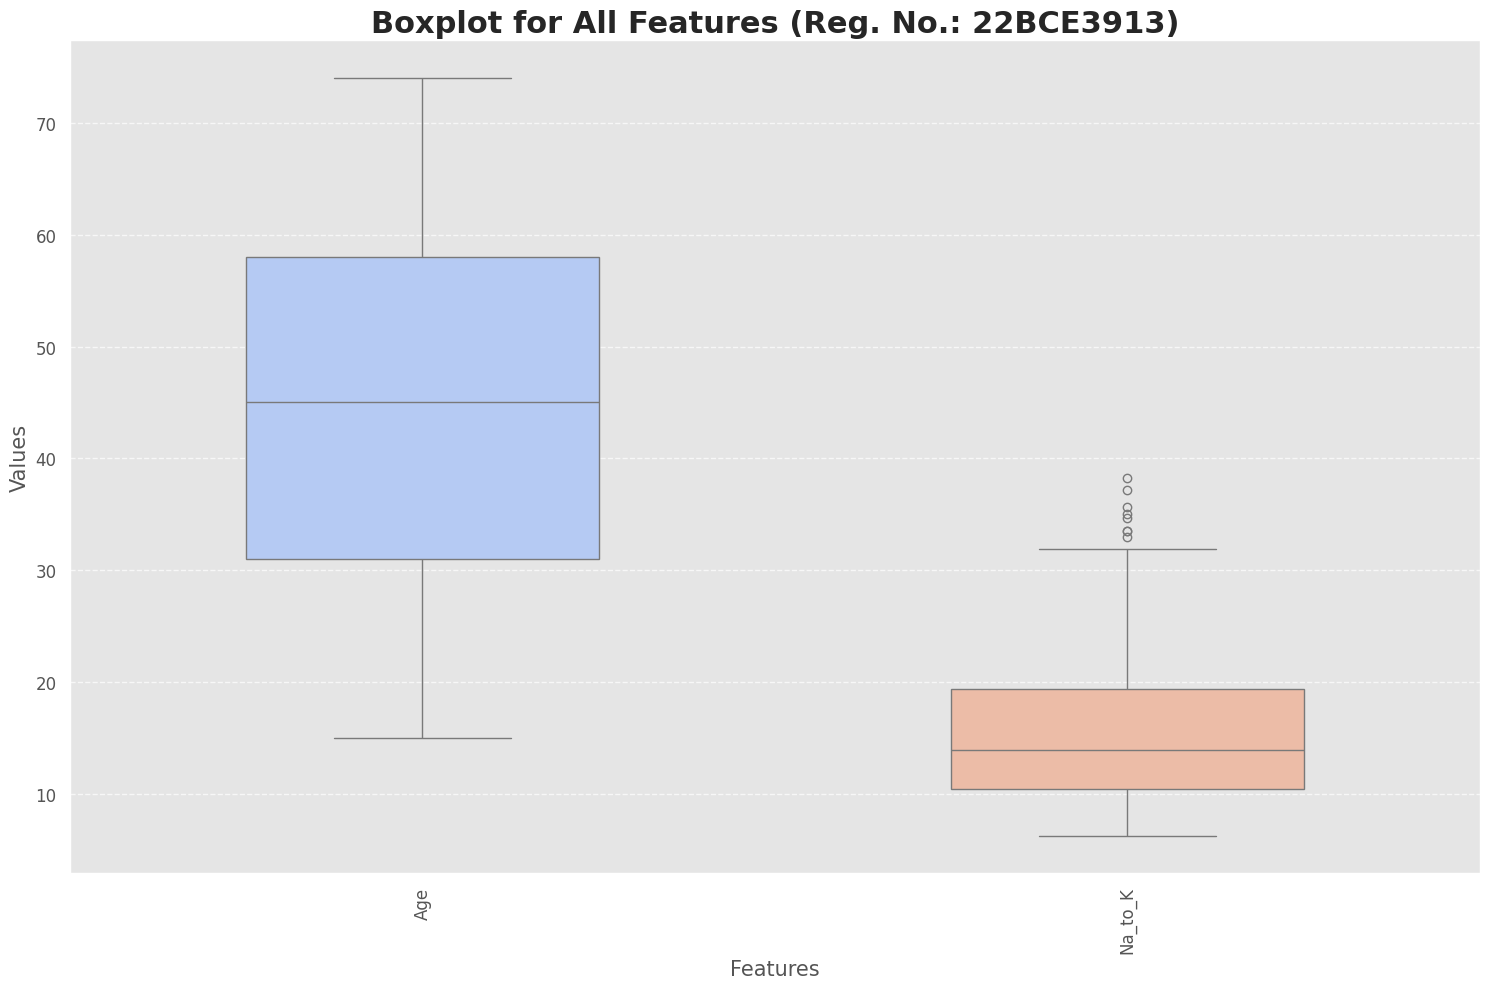

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.style.use('ggplot')

# Select only numeric columns
df_numeric = df.select_dtypes(include=['float64', 'int64'])

# Define a color palette with diverse colors for clarity
palette = sns.color_palette("coolwarm", n_colors=len(df_numeric.columns))

# Create the boxplot
plt.figure(figsize=(15, 10))
sns.boxplot(data=df_numeric, palette=palette, width=0.5)

# Enhance plot aesthetics
plt.title('Boxplot for All Features (Reg. No.: 22BCE3913)', fontsize=22, weight='bold')
plt.xlabel('Features', fontsize=15)
plt.ylabel('Values', fontsize=15)
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show plot
plt.tight_layout()
plt.show()

In [14]:
# Example mappings for drug200.csv
df['Sex'] = df['Sex'].map({'M': 1, 'F': 0})
df['BP'] = df['BP'].map({'LOW': 0, 'NORMAL': 1, 'HIGH': 2})
df['Cholesterol'] = df['Cholesterol'].map({'NORMAL': 0, 'HIGH': 1})
df['Drug'] = df['Drug'].map({'drugA': 0, 'drugB': 1, 'drugC': 2, 'drugX': 3, 'drugY': 4})

# ***Step 4: Bivariate Analysis***

**4.1 Create a Contingency Table**

In [15]:
import pandas as pd

# Define bins and labels for Age
bins = [0, 20, 40, 60, 80]
labels = ['Young', 'Adult', 'Middle-aged', 'Senior']

# Create a new categorical column based on "Age" values
df['age_category'] = pd.cut(df['Age'], bins=bins, labels=labels, include_lowest=True)

# Display first few rows to check
print(df[['Age', 'age_category']].head())

# Create a contingency table (e.g., comparing 'Sex' with age categories)
contingency_table = pd.crosstab(df['Sex'], df['age_category'])
print(contingency_table)

   Age age_category
0   23        Adult
1   47  Middle-aged
2   47  Middle-aged
3   28        Adult
4   61       Senior
age_category  Young  Adult  Middle-aged  Senior
Sex                                            
0                10     39           31      16
1                 6     32           42      24


# **4.2 Categorical vs. Categorical Analysis**

**4.2.1 Stacked Bar Chart**

<Figure size 1000x600 with 0 Axes>

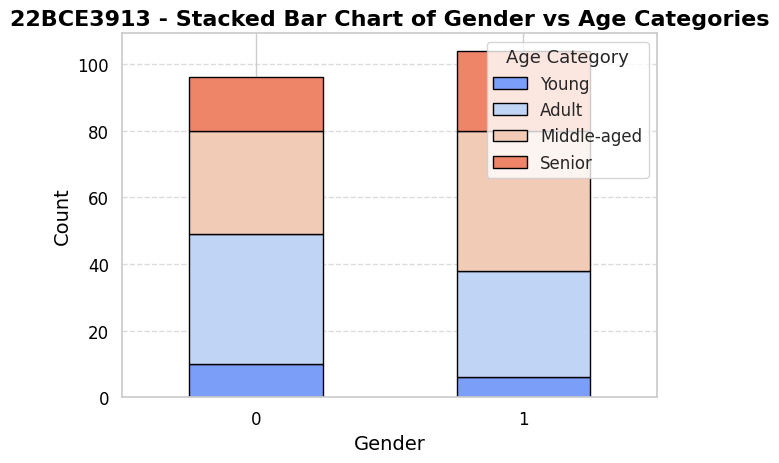

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

sns.set(style="whitegrid")

# Binning Age into categories
bins = [0, 20, 40, 60, 80]
labels = ['Young', 'Adult', 'Middle-aged', 'Senior']

df['age_category'] = pd.cut(df['Age'], bins=bins, labels=labels, include_lowest=True)

# Contingency table for Sex vs Age category
contingency_table = pd.crosstab(df['Sex'], df['age_category'])

plt.figure(figsize=(10, 6))

colors = sns.color_palette("coolwarm", n_colors=len(contingency_table.columns))

contingency_table.plot(
    kind='bar',
    stacked=True,
    color=colors,
    edgecolor='black',
    width=0.5
)

# Title & labels
plt.title("22BCE3913 - Stacked Bar Chart of Gender vs Age Categories", fontsize=16, fontweight='bold', color='black')
plt.xlabel("Gender", fontsize=14, color='black')
plt.ylabel("Count", fontsize=14, color='black')

# Customize ticks
plt.xticks(rotation=0, fontsize=12, color='black')
plt.yticks(fontsize=12, color='black')

# Grid lines
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Legend
plt.legend(title='Age Category', title_fontsize='13', fontsize='12', loc='upper right', frameon=True, shadow=False)

# Adjust layout
plt.tight_layout()

plt.show()

**4.2.2 Stacked Bar Plot with Seaborn**

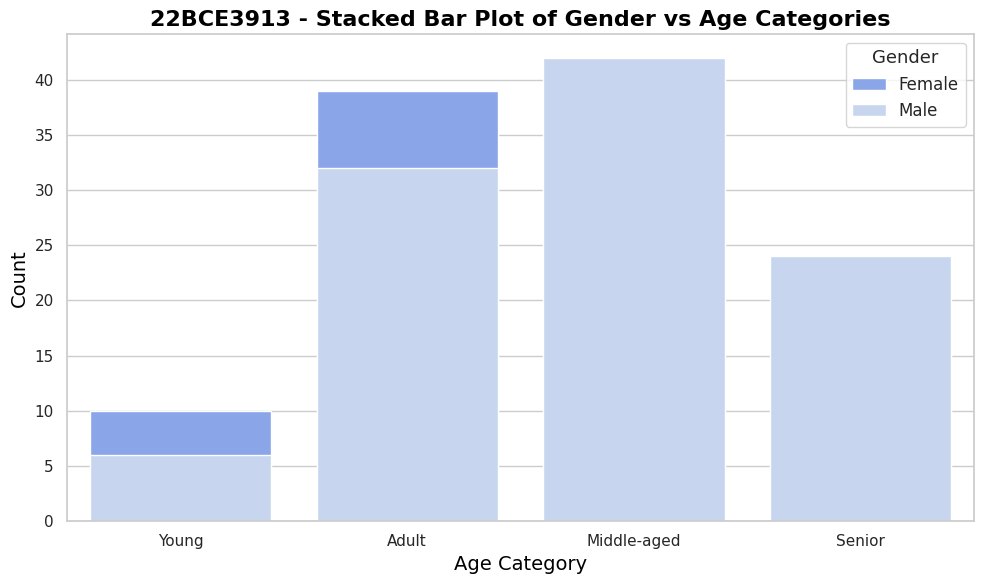

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load dataset
df = pd.read_csv("https://raw.githubusercontent.com/salemprakash/EDA/main/Data/drug200.csv")

sns.set(style="whitegrid")

# Define bins and labels for Age
bins = [0, 20, 40, 60, 100]
labels = ['Young', 'Adult', 'Middle-aged', 'Senior']

# Create a new categorical column based on Age
df['age_category'] = pd.cut(df['Age'], bins=bins, labels=labels, include_lowest=True)

# Set palette
sns.set_palette(sns.color_palette("coolwarm", n_colors=4))

# Stacked Bar Plot
plt.figure(figsize=(10, 6))
sns.countplot(x='age_category', hue='Sex', data=df, dodge=False)

# Title & labels
plt.title("22BCE3913 - Stacked Bar Plot of Gender vs Age Categories", fontsize=16, fontweight='bold', color='black')
plt.xlabel("Age Category", fontsize=14, color='black')
plt.ylabel("Count", fontsize=14, color='black')

# Legend customization
plt.legend(title='Gender', labels=['Female', 'Male'], fontsize=12, title_fontsize=13, loc='upper right')

plt.tight_layout()
plt.show()

**4.2.3 Grouped Bar Plot**

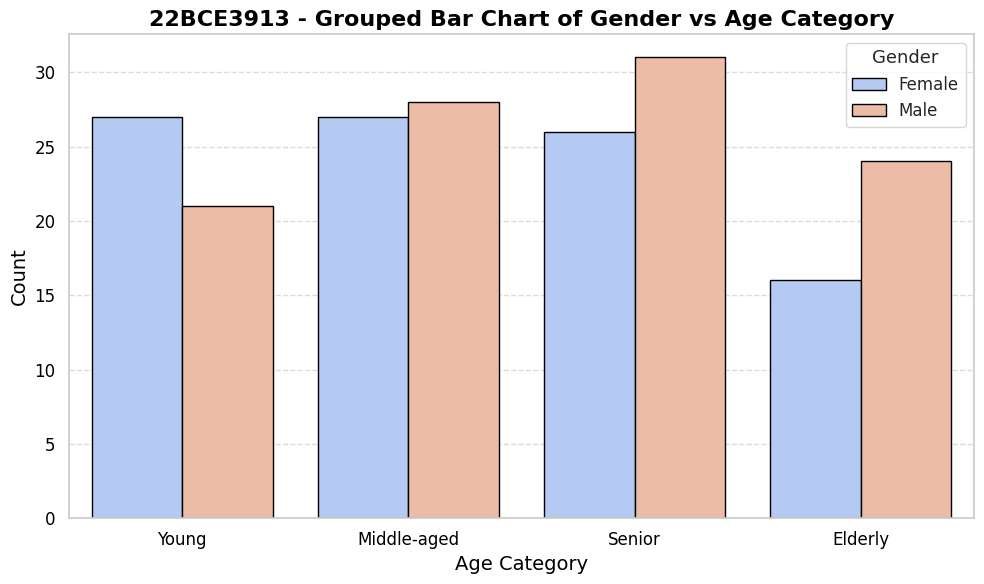

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load the drug dataset
url = "https://raw.githubusercontent.com/salemprakash/EDA/main/Data/drug200.csv"
df = pd.read_csv(url)

sns.set(style="whitegrid")

# Define bins and labels for Age
bins = [0, 30, 45, 60, 100]
labels = ['Young', 'Middle-aged', 'Senior', 'Elderly']

# Create a new categorical column based on "Age"
df['age_category'] = pd.cut(df['Age'], bins=bins, labels=labels, include_lowest=True)

# Create a figure with an appropriate size
plt.figure(figsize=(10, 6))

# Define a more diverse color palette
sns.set_palette(sns.color_palette("coolwarm", n_colors=2))

# Create a grouped bar chart (Age category vs Sex)
sns.countplot(data=df, x='age_category', hue='Sex', edgecolor='black')

# Set the title and labels
plt.title("22BCE3913 - Grouped Bar Chart of Gender vs Age Category", fontsize=16, fontweight='bold', color='black')
plt.xlabel("Age Category", fontsize=14, color='black')
plt.ylabel("Count", fontsize=14, color='black')

# Customize ticks
plt.xticks(fontsize=12, color='black')
plt.yticks(fontsize=12, color='black')

# Add grid lines
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Create a legend
plt.legend(title='Gender', labels=['Female', 'Male'], title_fontsize=13, fontsize=12, loc='upper right', frameon=True)

# Adjust layout
plt.tight_layout()

# Show the grouped bar chart
plt.show()

# **4.3 Categorical vs. Quantitative Analysis**

**4.3.1 Bar Chart**

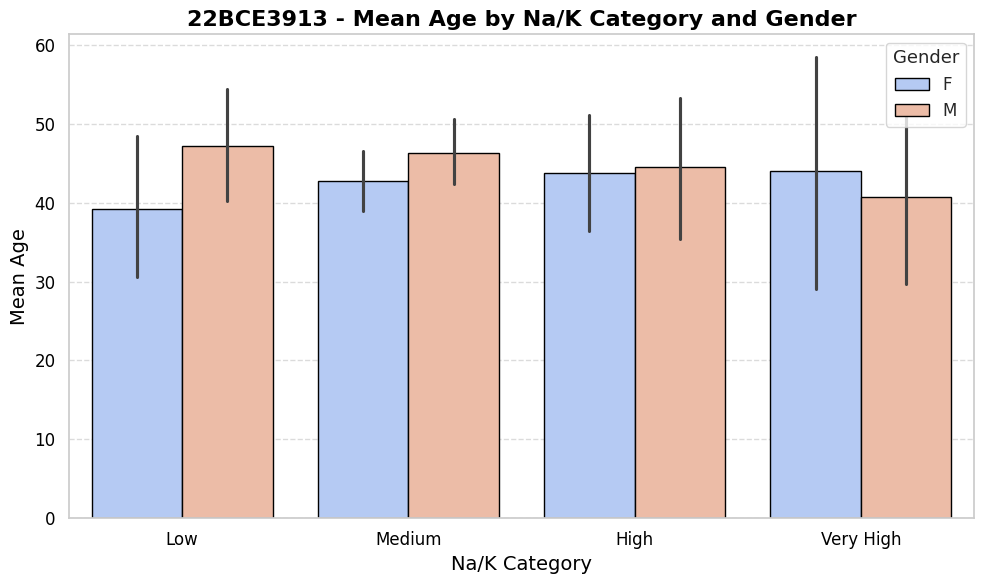

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load dataset
url = "https://raw.githubusercontent.com/salemprakash/EDA/main/Data/drug200.csv"
df = pd.read_csv(url)

sns.set(style="whitegrid")

# Define bins for Na_to_K ratio
bins = [0, 10, 20, 30, 40]
labels = ['Low', 'Medium', 'High', 'Very High']

# Create a new categorical column based on Na_to_K values
df['Na_to_K_Category'] = pd.cut(df['Na_to_K'], bins=bins, labels=labels, include_lowest=True)

# Create a figure
plt.figure(figsize=(10, 6))

# Set color palette
sns.set_palette(sns.color_palette("coolwarm", n_colors=2))

# Create a bar plot (Mean Age by Na_to_K category and gender)
sns.barplot(data=df, x='Na_to_K_Category', y='Age', hue='Sex', edgecolor='black')

# Title and labels
plt.title("22BCE3913 - Mean Age by Na/K Category and Gender", fontsize=16, fontweight='bold', color='black')
plt.xlabel("Na/K Category", fontsize=14, color='black')
plt.ylabel("Mean Age", fontsize=14, color='black')

# Customize ticks
plt.xticks(fontsize=12, color='black')
plt.yticks(fontsize=12, color='black')

# Add grid lines
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Legend
plt.legend(title='Gender', title_fontsize=13, fontsize=12, loc='upper right', frameon=True)

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

**4.3.2 Density Plot**

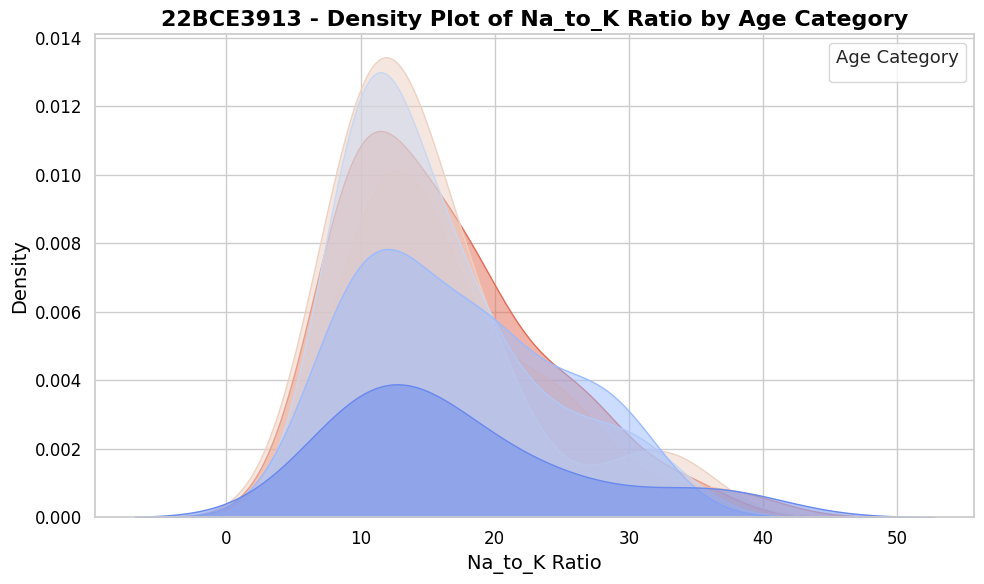

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load dataset
url = "https://raw.githubusercontent.com/salemprakash/EDA/main/Data/drug200.csv"
df = pd.read_csv(url)

sns.set(style="whitegrid")

# Define bins and labels for Age
bins = [0, 20, 30, 40, 50, 60, 100]
labels = ['<20', '20-29', '30-39', '40-49', '50-59', '60+']

# Create a new categorical column based on "Age"
df['age_category'] = pd.cut(df['Age'], bins=bins, labels=labels, include_lowest=True)

# Create a figure with an appropriate size
plt.figure(figsize=(10, 6))

# Distinct color palette for each age category
palette = sns.color_palette("coolwarm", n_colors=len(df['age_category'].unique()))

# KDE plot with filled areas (Na_to_K ratio vs Age category)
kde_plot = sns.kdeplot(data=df, x='Na_to_K', hue='age_category', fill=True,
                       palette=palette, alpha=0.5, warn_singular=False)

# Title and labels
plt.title("22BCE3913 - Density Plot of Na_to_K Ratio by Age Category",
          fontsize=16, fontweight='bold', color='black')
plt.xlabel("Na_to_K Ratio", fontsize=14, color='black')
plt.ylabel("Density", fontsize=14, color='black')

# Customize ticks
plt.xticks(fontsize=12, color='black')
plt.yticks(fontsize=12, color='black')

# Legend with better visibility
handles, labels = kde_plot.get_legend_handles_labels()
plt.legend(handles, labels, title='Age Category', title_fontsize='13',
           fontsize='12', loc='upper right', frameon=True)

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

**4.3.3 Box Plot**

/tmp/ipython-input-2355383180.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='age_category', y='Na_to_K', palette=palette)


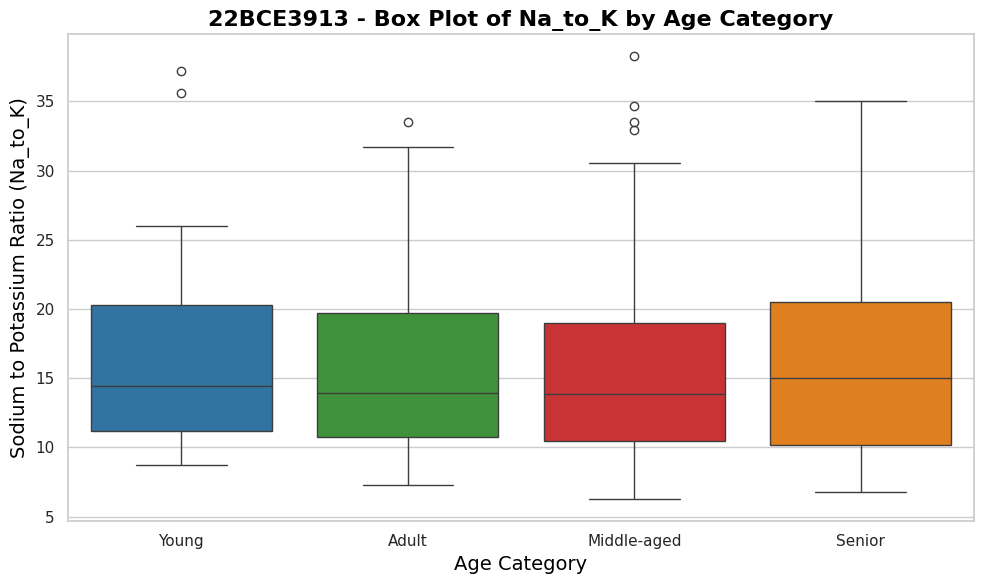

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load dataset
url = "https://raw.githubusercontent.com/salemprakash/EDA/main/Data/drug200.csv"
df = pd.read_csv(url)

sns.set(style="whitegrid")

# Example: Categorize Age into bins
bins = [0, 20, 40, 60, 100]
labels = ['Young', 'Adult', 'Middle-aged', 'Senior']

df['age_category'] = pd.cut(df['Age'], bins=bins, labels=labels, include_lowest=True)

# Plot: Boxplot of Na_to_K by Age Category
plt.figure(figsize=(10, 6))
palette = ["#1F78B4", "#33A02C", "#E31A1C", "#FF7F00"]

sns.boxplot(data=df, x='age_category', y='Na_to_K', palette=palette)

# Title and labels
plt.title("22BCE3913 - Box Plot of Na_to_K by Age Category",
          fontsize=16, fontweight='bold', color='black')
plt.xlabel("Age Category", fontsize=14, color='black')
plt.ylabel("Sodium to Potassium Ratio (Na_to_K)", fontsize=14, color='black')

plt.tight_layout()
plt.show()

**4.3.4 Violin Plot**

/tmp/ipython-input-2752528589.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='Drug', y='Na_to_K', palette=palette, linewidth=1, inner="box")
/tmp/ipython-input-2752528589.py:15: UserWarning: The palette list has more values (8) than needed (6), which may not be intended.
  sns.violinplot(data=df, x='Drug', y='Na_to_K', palette=palette, linewidth=1, inner="box")


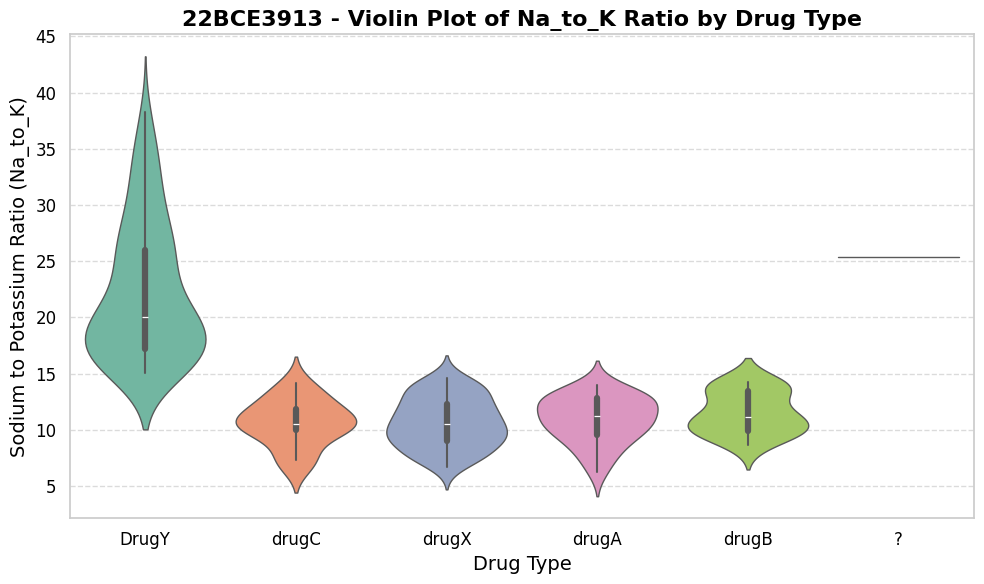

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load your dataset
df = pd.read_csv("https://raw.githubusercontent.com/salemprakash/EDA/main/Data/drug200.csv")

sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))

palette = sns.color_palette("Set2")

# Violin plot of Na_to_K by Drug type
sns.violinplot(data=df, x='Drug', y='Na_to_K', palette=palette, linewidth=1, inner="box")

# Titles and labels
plt.title("22BCE3913 - Violin Plot of Na_to_K Ratio by Drug Type", fontsize=16, fontweight='bold', color='black')
plt.xlabel("Drug Type", fontsize=14, color='black')
plt.ylabel("Sodium to Potassium Ratio (Na_to_K)", fontsize=14, color='black')

# Customize ticks
plt.xticks(fontsize=12, color='black')
plt.yticks(fontsize=12, color='black')

# Grid lines
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

**4.3.5 Combined Violin and Box Plots**

/tmp/ipython-input-3965392124.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='Drug', y='Na_to_K', palette=palette, inner=None)
/tmp/ipython-input-3965392124.py:14: UserWarning: The palette list has more values (7) than needed (6), which may not be intended.
  sns.violinplot(data=df, x='Drug', y='Na_to_K', palette=palette, inner=None)


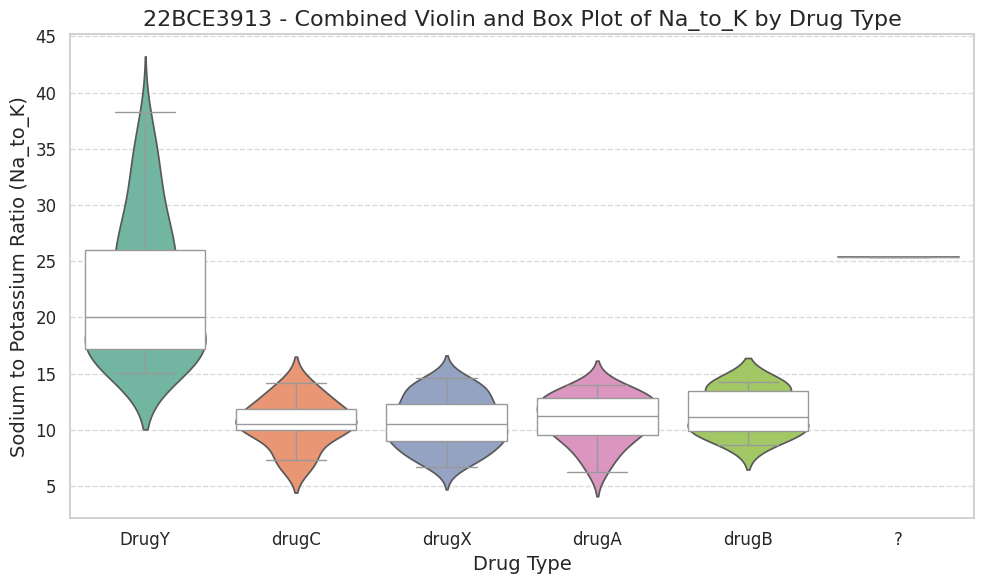

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load dataset
df = pd.read_csv("https://raw.githubusercontent.com/salemprakash/EDA/main/Data/drug200.csv")

plt.figure(figsize=(10, 6))

# Use custom color palette for each drug type
palette = sns.color_palette("Set2", len(df['Drug'].unique()))

# Violin plot
sns.violinplot(data=df, x='Drug', y='Na_to_K', palette=palette, inner=None)

# Box plot on top of violin plot
sns.boxplot(data=df, x='Drug', y='Na_to_K', color='white', fliersize=0)

# Title and labels
plt.title("22BCE3913 - Combined Violin and Box Plot of Na_to_K by Drug Type", fontsize=16)
plt.xlabel("Drug Type", fontsize=14)
plt.ylabel("Sodium to Potassium Ratio (Na_to_K)", fontsize=14)

# Tick adjustments
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Grid
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

# **4.4 Quantitative vs. Quantitative Analysis**

**4.4.1 Line Plot**

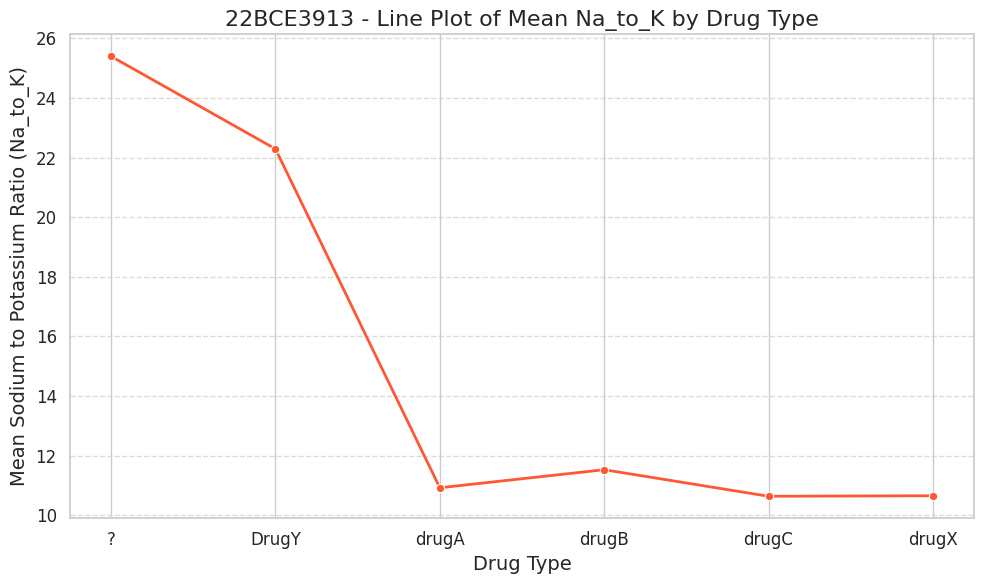

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load dataset
df = pd.read_csv("https://raw.githubusercontent.com/salemprakash/EDA/main/Data/drug200.csv")

# Calculate mean Na_to_K for each drug
mean_values = df.groupby('Drug')['Na_to_K'].mean().reset_index()

plt.figure(figsize=(10, 6))

line_color = "#FF5733"

# Create the line plot
sns.lineplot(data=mean_values, x='Drug', y='Na_to_K', marker='o', color=line_color, linewidth=2)

# Title and labels
plt.title("22BCE3913 - Line Plot of Mean Na_to_K by Drug Type", fontsize=16)
plt.xlabel("Drug Type", fontsize=14)
plt.ylabel("Mean Sodium to Potassium Ratio (Na_to_K)", fontsize=14)

# Ticks
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Grid
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

**4.4.2 Correlation Heatmap**

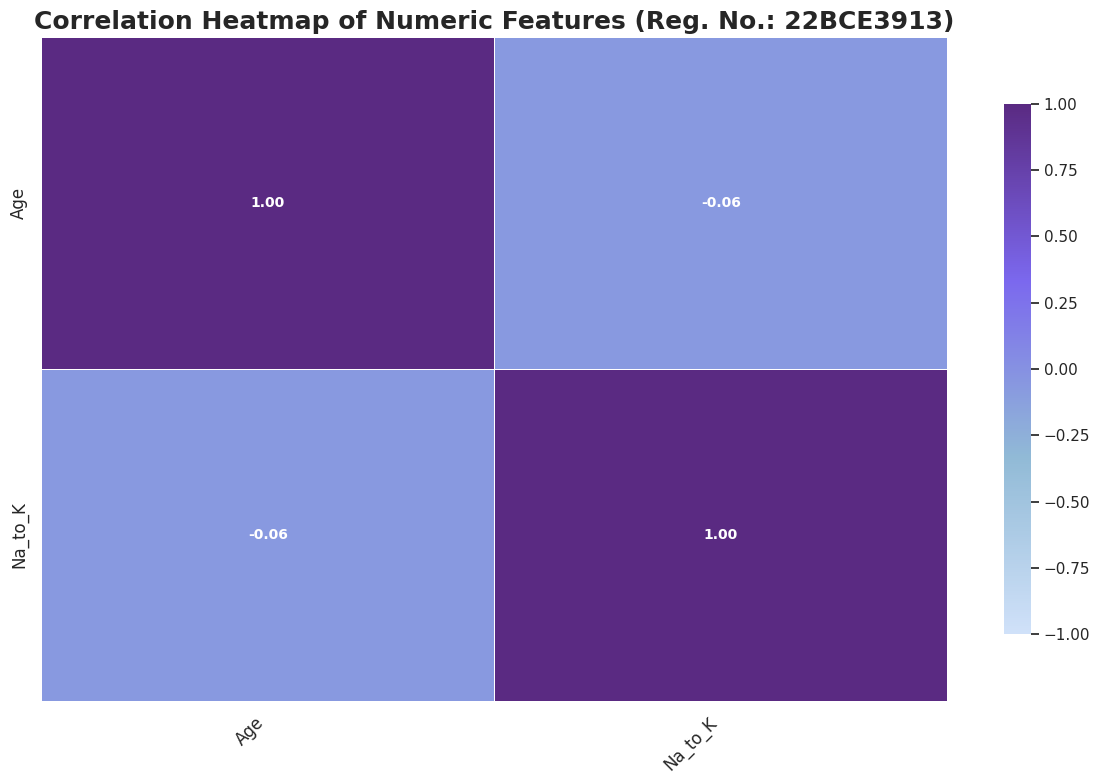

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap
import pandas as pd

# Load dataset
df = pd.read_csv("https://raw.githubusercontent.com/salemprakash/EDA/main/Data/drug200.csv")

# Define custom color map
colors = ["#d0e1f9", "#91bad6", "#7b68ee", "#5a2a82"]
cmap = LinearSegmentedColormap.from_list("blue_purple", colors, N=256)

# Select numeric columns
df_numeric = df.select_dtypes(include=['float64', 'int64'])

# Compute correlation
corr = df_numeric.corr()

# Create the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(
    corr,
    annot=True,
    cmap=cmap,
    fmt='.2f',
    linewidths=0.5,
    vmin=-1, vmax=1,
    center=0,
    cbar_kws={"shrink": .8},
    annot_kws={"size": 10, "weight": 'bold'}
)

# Customize plot
plt.title('Correlation Heatmap of Numeric Features (Reg. No.: 22BCE3913)', fontsize=18, fontweight='bold')
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)

# Show plot
plt.tight_layout()
plt.show()

**4.4.3 Scatter Plot**

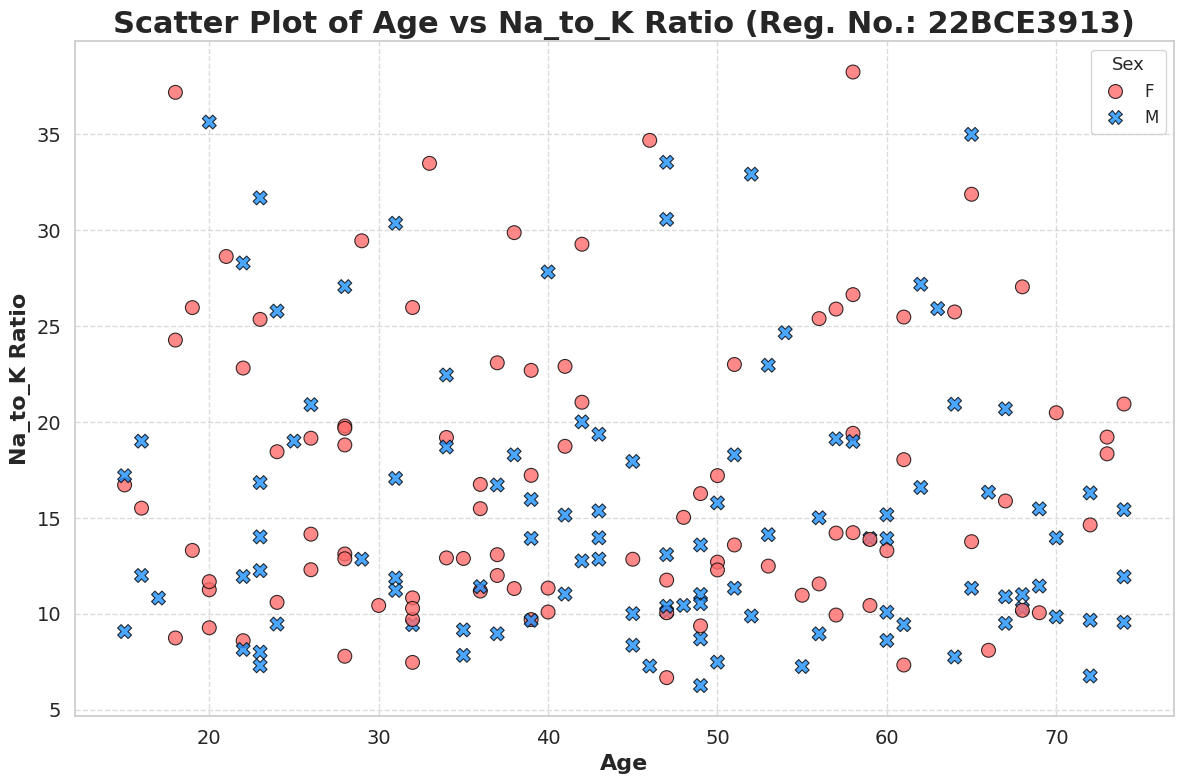

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

palette = sns.color_palette(["#FF6B6B", "#1E90FF"])  # Two colors for Sex

plt.figure(figsize=(12, 8))
sns.scatterplot(
    x='Age',         # X-axis: Age
    y='Na_to_K',     # Y-axis: Na_to_K ratio
    hue='Sex',       # Color by Sex (F or M)
    data=df,
    palette=palette,
    style='Sex',     # Marker style by Sex
    s=100,
    edgecolor='black',
    alpha=0.8
)

# Customize the plot
plt.title('Scatter Plot of Age vs Na_to_K Ratio (Reg. No.: 22BCE3913)', fontsize=22, weight='bold')
plt.xlabel('Age', fontsize=16, weight='bold')
plt.ylabel('Na_to_K Ratio', fontsize=16, weight='bold')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)

# Show the legend with a clear title
plt.legend(title='Sex', title_fontsize='13', fontsize='12', loc='best')

# Show the plot
plt.tight_layout()
plt.show()

# **Step 5: Multivariate Analysis**

**5.1 Scatter Plot with Color as a Third Variable**

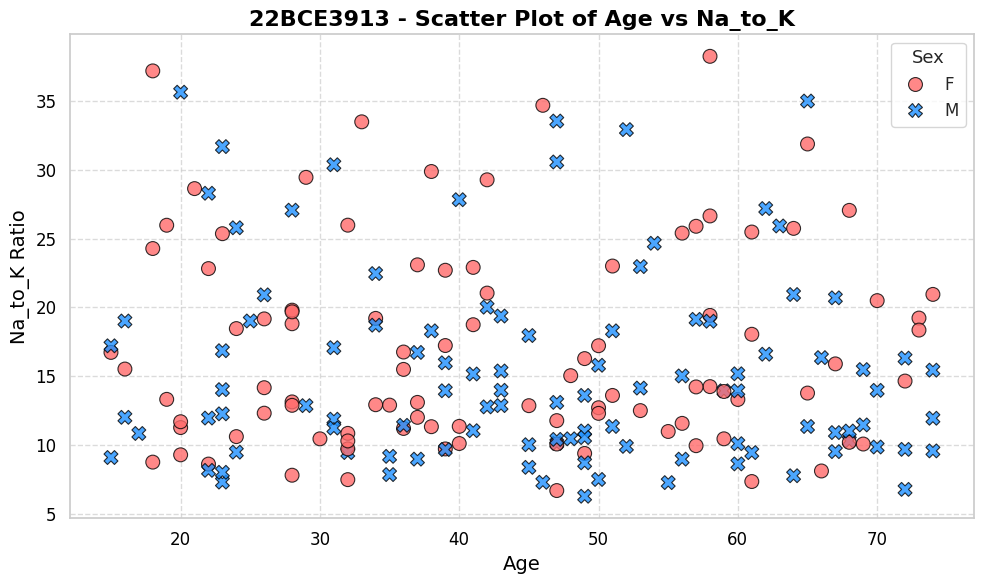

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load dataset
url = "https://raw.githubusercontent.com/salemprakash/EDA/main/Data/drug200.csv"
df = pd.read_csv(url)

# Color palette
palette = sns.color_palette(["#FF6B6B", "#1E90FF"])

# Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df,
    x='Age',
    y='Na_to_K',
    hue='Sex',
    palette=palette,
    style='Sex',
    s=100,
    edgecolor='black',
    alpha=0.8
)

# Title and labels
plt.title("22BCE3913 - Scatter Plot of Age vs Na_to_K", fontsize=16, fontweight='bold', color='black')
plt.xlabel("Age", fontsize=14, color='black')
plt.ylabel("Na_to_K Ratio", fontsize=14, color='black')
plt.xticks(fontsize=12, color='black')
plt.yticks(fontsize=12, color='black')
plt.grid(True, linestyle='--', alpha=0.7)

# Legend
plt.legend(title='Sex', title_fontsize='13', fontsize='12', loc='best')

plt.tight_layout()
plt.show()

**5.2 Scatter Plot with Color and Shape as Variables**

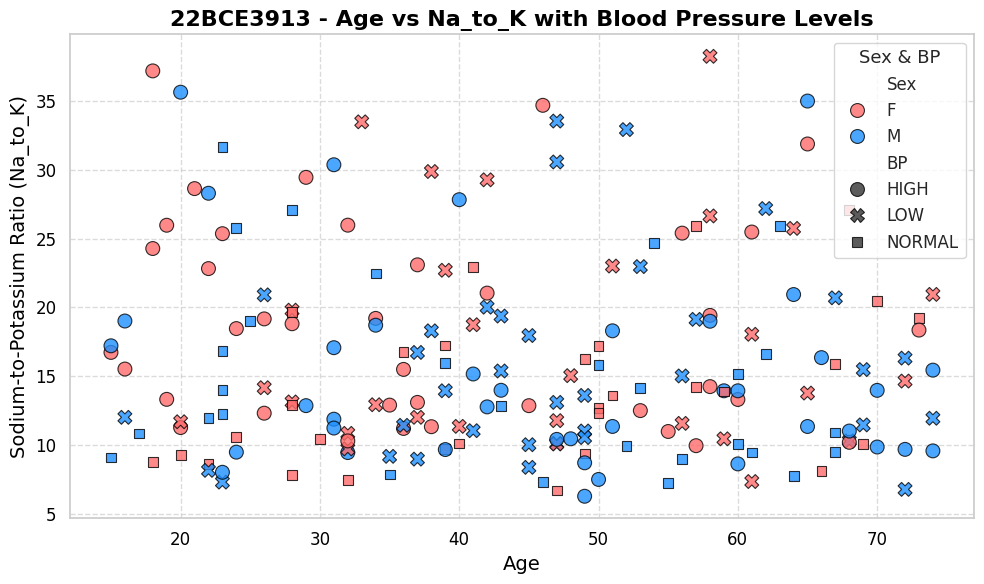

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load dataset
url = "https://raw.githubusercontent.com/salemprakash/EDA/main/Data/drug200.csv"
df = pd.read_csv(url)

# Custom color palette for Male & Female
palette = sns.color_palette(["#FF6B6B", "#1E90FF"])

plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df,
    x='Age',
    y='Na_to_K',
    hue='Sex',        # Color by gender
    style='BP',       # Marker style by Blood Pressure
    palette=palette,
    s=100,
    edgecolor='black',
    alpha=0.8
)

plt.title(
    "22BCE3913 - Age vs Na_to_K with Blood Pressure Levels",
    fontsize=16,
    fontweight='bold',
    color='black'
)
plt.xlabel("Age", fontsize=14, color='black')
plt.ylabel("Sodium-to-Potassium Ratio (Na_to_K)", fontsize=14, color='black')
plt.xticks(fontsize=12, color='black')
plt.yticks(fontsize=12, color='black')
plt.grid(True, linestyle='--', alpha=0.7)

plt.legend(title='Sex & BP', title_fontsize=13, fontsize=12, loc='best')

plt.tight_layout()
plt.show()

# **5.3 Scatter Plot with Color and Size as Variables**

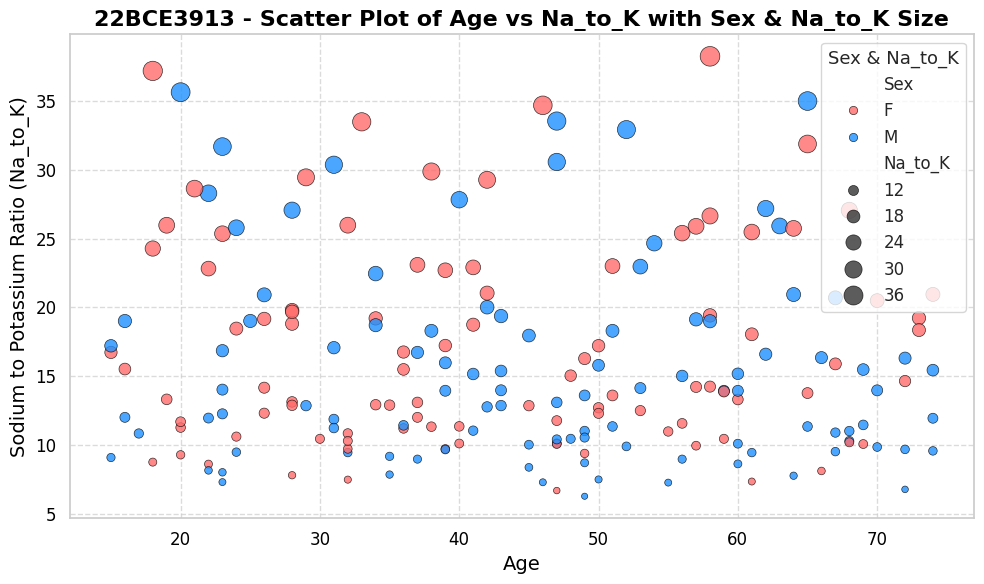

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
url = "https://raw.githubusercontent.com/salemprakash/EDA/main/Data/drug200.csv"
df = pd.read_csv(url)

# Define color palette for Sex
palette = sns.color_palette(["#FF6B6B", "#1E90FF"])

# Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df,
    x='Age',
    y='Na_to_K',
    hue='Sex',
    size='Na_to_K',
    sizes=(20, 200),
    palette=palette,
    edgecolor='black',
    alpha=0.8
)

# Title and labels
plt.title("22BCE3913 - Scatter Plot of Age vs Na_to_K with Sex & Na_to_K Size",
          fontsize=16, fontweight='bold', color='black')
plt.xlabel("Age", fontsize=14, color='black')
plt.ylabel("Sodium to Potassium Ratio (Na_to_K)", fontsize=14, color='black')
plt.xticks(fontsize=12, color='black')
plt.yticks(fontsize=12, color='black')
plt.grid(True, linestyle='--', alpha=0.7)

# Legend
plt.legend(title='Sex & Na_to_K', title_fontsize='13', fontsize='12', loc='best')

plt.tight_layout()
plt.show()

**5.4 Bubble Plot**

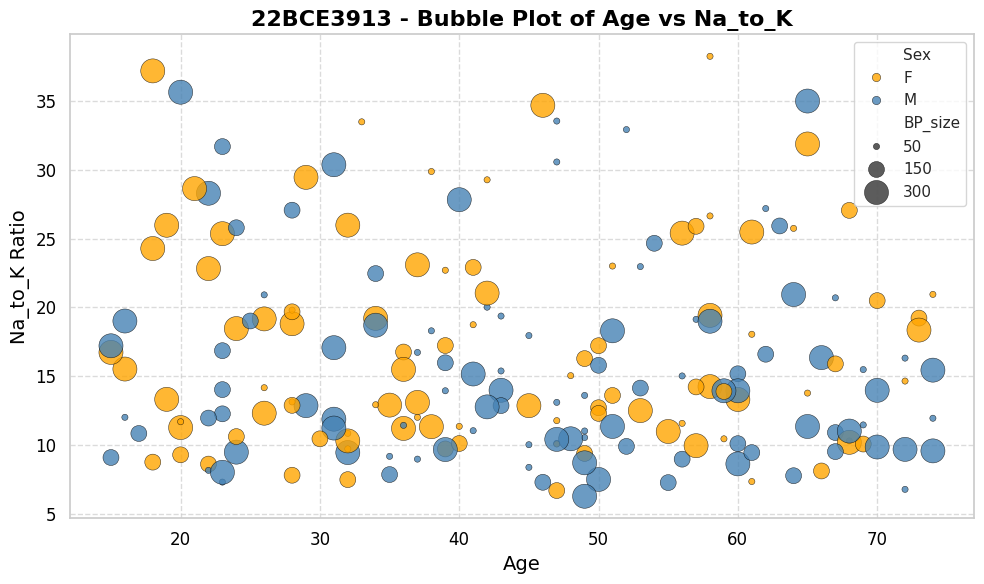

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load dataset
url = "https://raw.githubusercontent.com/salemprakash/EDA/main/Data/drug200.csv"
df = pd.read_csv(url)

# Map categorical BP to numeric sizes
bp_size_map = {'LOW': 50, 'NORMAL': 150, 'HIGH': 300}
df['BP_size'] = df['BP'].map(bp_size_map)

# Custom color palette
palette = sns.color_palette(["#FFA500", "#4682B4"])

# Create scatter (bubble) plot
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df,
    x='Age',
    y='Na_to_K',
    hue='Sex',
    size='BP_size',
    sizes=(20, 300),
    palette=palette,
    edgecolor='black',
    alpha=0.8
)

# Title and labels
plt.title("22BCE3913 - Bubble Plot of Age vs Na_to_K", fontsize=16, fontweight='bold', color='black')
plt.xlabel("Age", fontsize=14, color='black')
plt.ylabel("Na_to_K Ratio", fontsize=14, color='black')
plt.xticks(fontsize=12, color='black')
plt.yticks(fontsize=12, color='black')
plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

**5.5 Faceted Histogram**

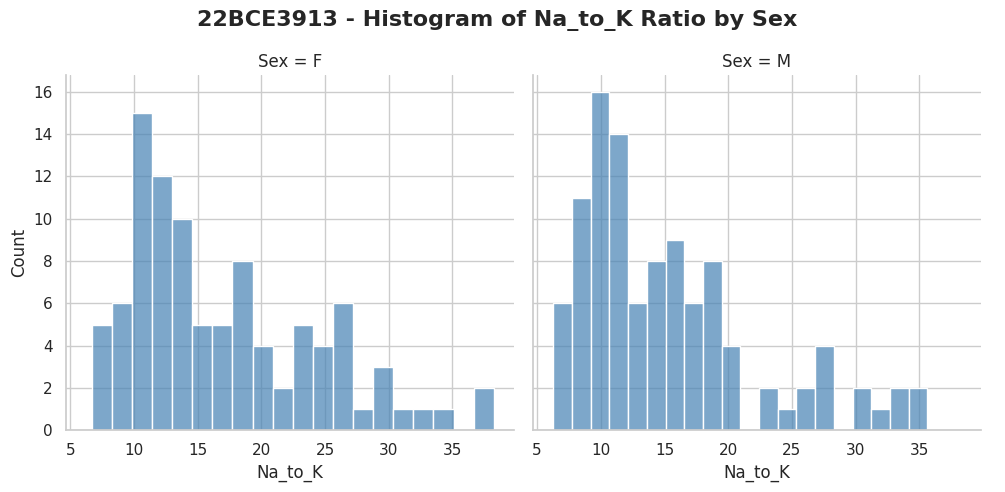

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load dataset
url = "https://raw.githubusercontent.com/salemprakash/EDA/main/Data/drug200.csv"
df = pd.read_csv(url)

# Colors for male/female
colors = ["#FFA500", "#4682B4"]

# FacetGrid histogram
g = sns.FacetGrid(df, col='Sex', height=5, aspect=1, palette=colors)
g.map(sns.histplot, 'Na_to_K', bins=20, alpha=0.7, color="#4682B4")

# Add legend and title
g.add_legend()
plt.subplots_adjust(top=0.85)
g.fig.suptitle("22BCE3913 - Histogram of Na_to_K Ratio by Sex", fontsize=16, fontweight='bold')

plt.show()

**5.6 Pairplot**

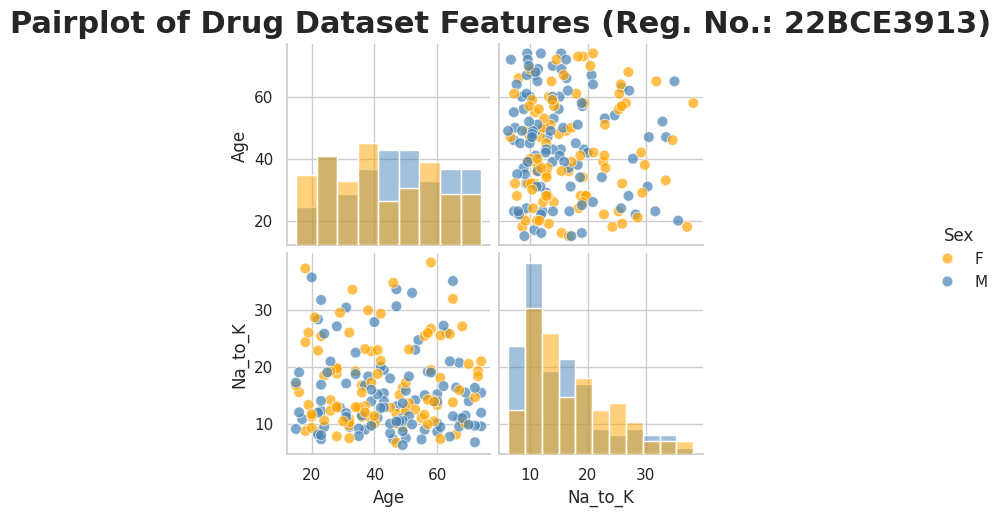

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load dataset
url = "https://raw.githubusercontent.com/salemprakash/EDA/main/Data/drug200.csv"
df = pd.read_csv(url)

# Custom color palette for male and female
palette = sns.color_palette(["#FFA500", "#4682B4"])

# Features to include in the pairplot
features_of_interest = ['Age', 'Na_to_K']  # numeric features
df_relevant = df[features_of_interest + ['Sex']]

# Create pairplot
pairplot = sns.pairplot(
    df_relevant,
    hue='Sex',
    palette=palette,
    diag_kind='hist',
    plot_kws={'alpha': 0.7, 'edgecolor': 'w', 's': 60},
)

# Add title
pairplot.fig.suptitle('Pairplot of Drug Dataset Features (Reg. No.: 22BCE3913)',
                      fontsize=22, weight='bold', y=1.02)
pairplot.fig.subplots_adjust(top=0.95)

plt.show()

# **Module 2**

**6.1 Merging Data**

In [37]:
import pandas as pd

df1SE = pd.DataFrame({'StudentID': [2, 3, 4], 'ScoreSE': [23, 15, 41]})
df2SE = pd.DataFrame({'StudentID': [6, 7, 10], 'ScoreSE': [27, 50, 31]})

df1ML = pd.DataFrame({'StudentID': [1, 4, 5], 'ScoreML': [39, 41, 19]})
df2ML = pd.DataFrame({'StudentID': [6, 7, 8, 9], 'ScoreML': [20, 43, 31, 34]})

dfSE = pd.concat([df1SE, df2SE], ignore_index=True)
dfML = pd.concat([df1ML, df2ML], ignore_index=True)

df2 = pd.merge(dfML, dfSE, on="StudentID", how="outer")

print(df2)

   StudentID  ScoreML  ScoreSE
0          1     39.0      NaN
1          2      NaN     23.0
2          3      NaN     15.0
3          4     41.0     41.0
4          5     19.0      NaN
5          6     20.0     27.0
6          7     43.0     50.0
7          8     31.0      NaN
8          9     34.0      NaN
9         10      NaN     31.0


In [38]:
df2 = dfSE.merge(dfML, how='inner')
df2

,StudentID,ScoreSE,ScoreML
0,4,41,41
1,6,27,20
2,7,50,43


In [39]:
df2 = dfSE.merge(dfML, how='left')
df2

,StudentID,ScoreSE,ScoreML
0,2,23,NaN
1,3,15,NaN
2,4,41,41.0
3,6,27,20.0
4,7,50,43.0
5,10,31,NaN


In [40]:
df2 = dfSE.merge(dfML, how='right')
df2

,StudentID,ScoreSE,ScoreML
0,1,NaN,39
1,4,41.0,41
2,5,NaN,19
3,6,27.0,20
4,7,50.0,43
5,8,NaN,31
6,9,NaN,34


In [41]:
import pandas as pd

# Load drug dataset
url = 'https://raw.githubusercontent.com/salemprakash/EDA/main/Data/drug200.csv'
df = pd.read_csv(url)

# Print column names
print(df.columns)

# Create age groups
df['age_group'] = pd.cut(df['Age'], bins=[0, 18, 35, 50, 100], labels=['0-18', '19-35', '36-50', '51+'])

print(df[['Age', 'age_group']].head())

Index(['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K', 'Drug'], dtype='object')
   Age age_group
0   23     19-35
1   47     36-50
2   47     36-50
3   28     19-35
4   61       51+


In [42]:
import pandas as pd

# Load drug dataset
url = 'https://raw.githubusercontent.com/salemprakash/EDA/main/Data/drug200.csv'
df = pd.read_csv(url)

# Create age_group column
df['age_group'] = pd.cut(df['Age'], bins=[0, 18, 35, 50, 100], labels=['0-18', '19-35', '36-50', '51+'])

# Set multi-index with age_group and Sex
df.set_index(['age_group', 'Sex'], inplace=True)

# Select subset for age_group = '19-35' and Sex = 'F'
subset = df.loc[('19-35', 'F')]
print(subset)

               Age      BP Cholesterol  Na_to_K   Drug
age_group Sex                                         
19-35     F     23    HIGH        HIGH   25.355  DrugY
          F     28  NORMAL        HIGH    7.798  drugX
          F     22  NORMAL        HIGH    8.607  drugX
          F     34    HIGH      NORMAL   19.199  DrugY
          F     32    HIGH      NORMAL   25.974  DrugY
          F     33     LOW        HIGH   33.486  DrugY
          F     28    HIGH      NORMAL   18.809  DrugY
          F     28     LOW        HIGH   19.796  DrugY
          F     24    HIGH      NORMAL   18.457  DrugY
          F     26     LOW        HIGH   14.160  drugC
          F     28  NORMAL        HIGH   19.675  DrugY
          F     24  NORMAL        HIGH   10.605  drugX
          F     26    HIGH      NORMAL   19.161  DrugY
          F     19    HIGH        HIGH   13.313  drugA
          F     32     LOW      NORMAL   10.840  drugX
          F     32     LOW        HIGH    9.712  drugC
          

/tmp/ipython-input-2849194834.py:14: PerformanceWarning: indexing past lexsort depth may impact performance.
  subset = df.loc[('19-35', 'F')]


In [45]:
import pandas as pd

# Load drug dataset
url = 'https://raw.githubusercontent.com/salemprakash/EDA/main/Data/drug200.csv'
df = pd.read_csv(url)

# Create a smaller dataframe with Sex and Drug
df_merge = df[['Sex', 'Drug']]

# Merge back with original dataset on Sex
df_merged = pd.merge(df, df_merge, on='Sex')

print(df_merged.head())

   Age Sex    BP Cholesterol  Na_to_K Drug_x Drug_y
0   23   F  HIGH        HIGH   25.355  DrugY  DrugY
1   23   F  HIGH        HIGH   25.355  DrugY  drugX
2   23   F  HIGH        HIGH   25.355  DrugY  DrugY
3   23   F  HIGH        HIGH   25.355  DrugY  drugX
4   23   F  HIGH        HIGH   25.355  DrugY  DrugY


**6.2 Reshaping with Hierarchical Indexing**

In [46]:
# Set multi-index with existing columns
df.set_index(['Sex', 'Age'], inplace=True)
print("With Multi-Index:\n", df.head())

# Reset index back to default integer index
df.reset_index(inplace=True)
print("\nAfter Resetting Index:\n", df.head())

With Multi-Index:
              BP Cholesterol  Na_to_K   Drug
Sex Age                                    
F   23     HIGH        HIGH   25.355  DrugY
M   47      LOW        HIGH   13.093  drugC
    47      LOW        HIGH   10.114  drugC
F   28   NORMAL        HIGH    7.798  drugX
    61      LOW        HIGH   18.043  DrugY

After Resetting Index:
   Sex  Age      BP Cholesterol  Na_to_K   Drug
0   F   23    HIGH        HIGH   25.355  DrugY
1   M   47     LOW        HIGH   13.093  drugC
2   M   47     LOW        HIGH   10.114  drugC
3   F   28  NORMAL        HIGH    7.798  drugX
4   F   61     LOW        HIGH   18.043  DrugY


**6.3 Transformation Techniques**

In [47]:
# Apply log transformation to Age
df['log_age'] = np.log(df['Age'] + 1)
print(df[['Age', 'log_age']].head())

   Age   log_age
0   23  3.178054
1   47  3.871201
2   47  3.871201
3   28  3.367296
4   61  4.127134


**6.4 Discretization and Binning**

In [48]:
# Define bins and labels for Age
bins = [0, 20, 40, 60, 100]
labels = ['Young', 'Adult', 'Middle-aged', 'Senior']

# Create a new binned column
df['age_bin'] = pd.cut(df['Age'], bins=bins, labels=labels)

# View the new column
print(df[['Age', 'age_bin']].head())

   Age      age_bin
0   23        Adult
1   47  Middle-aged
2   47  Middle-aged
3   28        Adult
4   61       Senior


# **Module 3**

**7.1 Time-Series Analysis**

Since my dataset isn't time-series based, this can be adapted by using a mock column or working with the timestamp for exploratory purposes. However, this step can be omitted if not relevant to the current dataset.


**7.2 Create a Simulated Time Index**

Assuming each row is a time point, create an index.

In [53]:
df['time'] = pd.Series(range(len(df)))

**7.3 Check for Missing Values**

In [54]:
import pandas as pd

# Add a 'time' column (sequential index)
df['time'] = pd.Series(range(len(df)))

# Check missing values
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

# Fill missing values for categorical columns
df = df.assign(
    Cholesterol = df['Cholesterol'].fillna(df['Cholesterol'].mode()[0])
)

# Drop rows where the target 'Drug' is missing
df = df[df['Drug'].notnull()]

# Verify again
missing_values = df.isnull().sum()
print("\nAfter handling missing values:\n", missing_values)

Missing Values:
 Sex            0
Age            0
BP             0
Cholesterol    1
Na_to_K        0
Drug           1
log_age        0
age_bin        0
time           0
dtype: int64

After handling missing values:
 Sex            0
Age            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
log_age        0
age_bin        0
time           0
dtype: int64


In [55]:
print(df.columns)

Index(['Sex', 'Age', 'BP', 'Cholesterol', 'Na_to_K', 'Drug', 'log_age',
       'age_bin', 'time'],
      dtype='object')


In [56]:
df.rename(columns=lambda x: x.strip(), inplace=True)

In [57]:
import pandas as pd

# Example: bin 'Age' into Low, Medium, High
bins = [0, 30, 50, 100]  # adjust as needed for your data
labels = ['Young', 'Middle-aged', 'Old']
df['age_bin'] = pd.cut(df['Age'], bins=bins, labels=labels)

print(df[['Age', 'age_bin']].head())

   Age      age_bin
0   23        Young
1   47  Middle-aged
2   47  Middle-aged
3   28        Young
4   61          Old


In [58]:
if 'age_bin' in df.columns:
    print(df[['Age', 'age_bin']].head())
else:
    print("Column 'age_bin' is missing. Re-run the binning step.")

   Age      age_bin
0   23        Young
1   47  Middle-aged
2   47  Middle-aged
3   28        Young
4   61          Old


**7.4 Plot the Time Series**

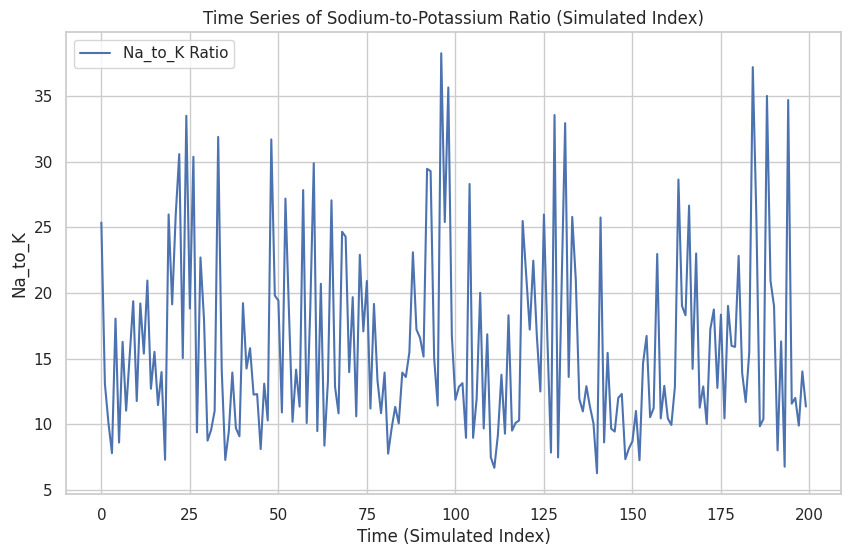

In [59]:
import matplotlib.pyplot as plt

# Add a time column if not present
if 'time' not in df.columns:
    df['time'] = range(len(df))

plt.figure(figsize=(10, 6))
plt.plot(df['time'], df['Na_to_K'], label='Na_to_K Ratio', color='b')

plt.title("Time Series of Sodium-to-Potassium Ratio (Simulated Index)")
plt.xlabel("Time (Simulated Index)")
plt.ylabel("Na_to_K")
plt.legend()
plt.grid(True)

plt.show()

**7.5 Decompose the Dataset**

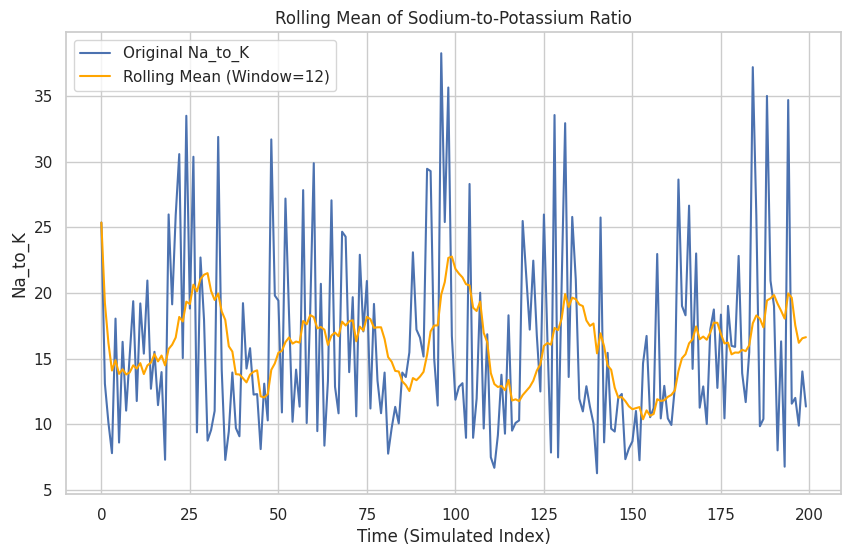

In [60]:
import matplotlib.pyplot as plt

# Add a time column if not present
if 'time' not in df.columns:
    df['time'] = range(len(df))

# Compute rolling mean
df['rolling_mean_Na_to_K'] = df['Na_to_K'].rolling(window=12, min_periods=1).mean()

# Plot
plt.figure(figsize=(10, 6))
plt.plot(df['time'], df['Na_to_K'], label='Original Na_to_K')
plt.plot(df['time'], df['rolling_mean_Na_to_K'], label='Rolling Mean (Window=12)', color='orange', linestyle='-')

plt.title("Rolling Mean of Sodium-to-Potassium Ratio")
plt.xlabel("Time (Simulated Index)")
plt.ylabel("Na_to_K")
plt.legend()
plt.grid(True)
plt.show()

**7.6 Make the Dataset Stationary**

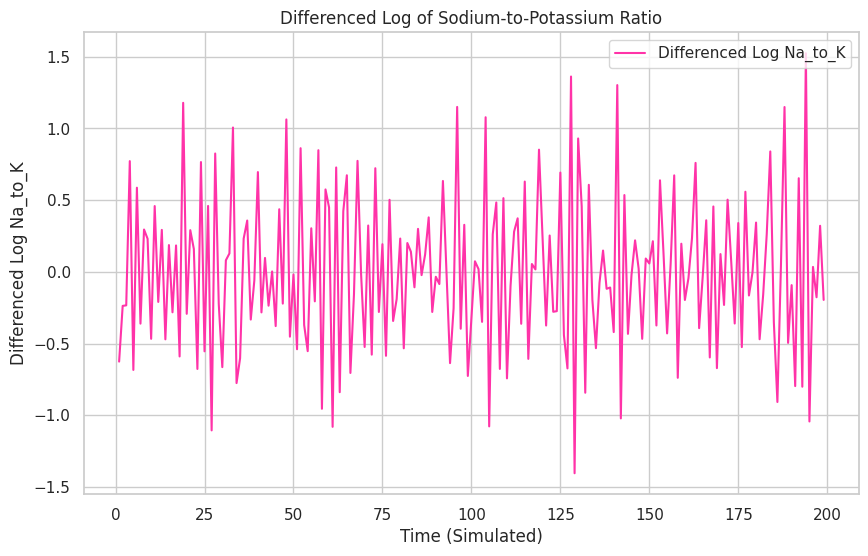

In [61]:
import numpy as np
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")

if 'Na_to_K' in df.columns:
    # Log transform
    df['log_Na_to_K'] = np.log(df['Na_to_K'] + 1)

    # Differencing
    df['diff_log_Na_to_K'] = df['log_Na_to_K'].diff()

    # Plot
    plt.figure(figsize=(10, 6))
    plt.plot(df['time'], df['diff_log_Na_to_K'], label='Differenced Log Na_to_K', color="#FF33A8")
    plt.title("Differenced Log of Sodium-to-Potassium Ratio")
    plt.xlabel("Time (Simulated)")
    plt.ylabel("Differenced Log Na_to_K")
    plt.legend(loc='upper right')
    plt.grid(True)
    plt.show()
else:
    print("Column 'Na_to_K' not found in the DataFrame.")

**7.7 Plot Box Plot Across Categories**

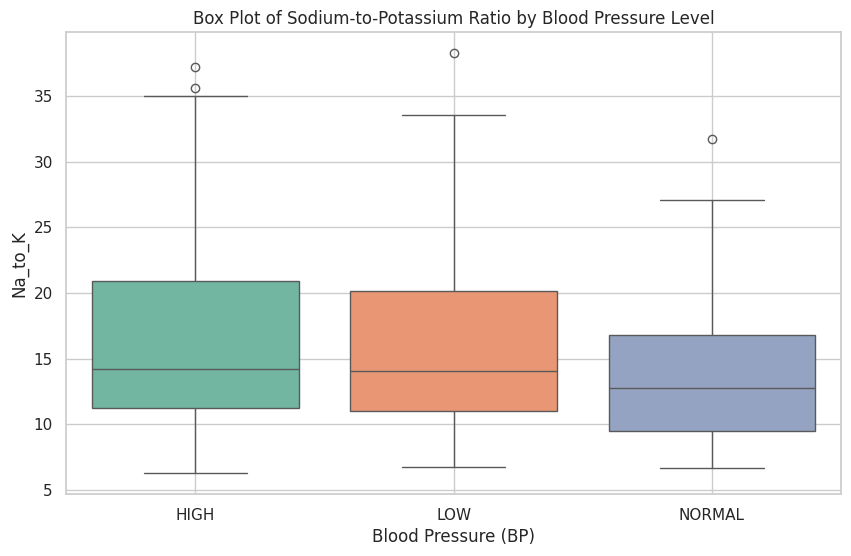

In [62]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.boxplot(x='BP', y='Na_to_K', data=df, palette="Set2")

plt.title("Box Plot of Sodium-to-Potassium Ratio by Blood Pressure Level")
plt.xlabel("Blood Pressure (BP)")
plt.ylabel("Na_to_K")
plt.grid(True)
plt.show()